<a href="https://colab.research.google.com/github/SoniaPMi/AI-3-RL/blob/main/1_basic_vs_egreedy_5bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estrategia $\epsilon$-greedy con bandits Gaussianos**

- El agente puede tomar 3 acciones ("bandits"): 1, 2, 3
- El resultado de la acción i tiene un reward r_i
- El r_i sigue una distribución gaussiana con media m_i y desviación estándar std_i
- Los 6 parámetros (m_1, std_1, m_2, std_2, m3, std_3) son inicialmente desconocidos para el agente
- El agente tiene que tomar decisiones una y otra vez
- Su objetivo es maximizar su beneficio

In [ ]:
# Adaptado de:
#
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python

In [ ]:
!ls

sample_data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm as gaussiana

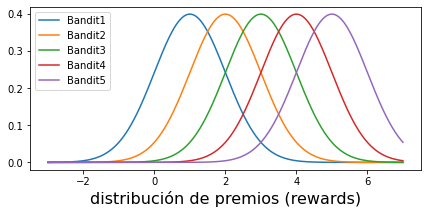

In [ ]:
m1   = 1. # medias y desviaciones estándar de los premios (rewards) que da cada bandit
std1 = 1
m2   = 2
std2 = 1
m3   = 3.
std3 = 1

m4   = 4
std4 = 1
m5   = 5.
std5 = 1


plt.figure(figsize=(7,3))
premios = np.linspace(-3,7,1000)

#funciones de distribución teóricas (funciones gaussianas)
#funciones de distribución - histograma normalizado para que tenga área 1

plt.plot(premios, gaussiana.pdf(x=premios, loc=m1, scale=std1), label='Bandit1') #loc = media teórica distribución, scale : std teórica
plt.plot(premios, gaussiana.pdf(x=premios, loc=m2, scale=std2), label='Bandit2')
plt.plot(premios, gaussiana.pdf(x=premios, loc=m3, scale=std3), label='Bandit3')

plt.plot(premios, gaussiana.pdf(x=premios, loc=m4, scale=std4), label='Bandit4')
plt.plot(premios, gaussiana.pdf(x=premios, loc=m5, scale=std5), label='Bandit5')

plt.xlabel('distribución de premios (rewards)', fontsize=16)
plt.legend();

### Entorno

Clases en Python

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier() # genero una instancia de la clase MLPClassifier

In [ ]:
type(clf)

sklearn.neural_network._multilayer_perceptron.MLPClassifier

In [ ]:
#clf.fit()

In [ ]:
def faux(x):
    return x*x

x = faux(3)
print(x)

9


In [ ]:
class miclase:
    def __init__(self, ini=1):
      print("Creo una instancia")
      self.a = ini
    def miprint(self, b=1):
      print("Campo a:", self.a)
      print("Datos adicionales:", b)

In [ ]:
x = miclase()

Creo una instancia


In [ ]:
x.a

1

In [ ]:
x.a = 2

In [ ]:
x.miprint()

Campo a: 2
Datos adicionales: 1


In [ ]:
y = miclase()
y.miprint()

Creo una instancia
Campo a: 1
Datos adicionales: 1


In [ ]:
x.a

2

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(2)
np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()

(0.43599490214200376,
 0.025926231827891333,
 0.5496624778787091,
 0.4353223926182769,
 0.42036780208748903)

In [ ]:
# Simulación de las máquinas tragaperras

class Bandit:
    def __init__(self, mean, std=1, addseed=0): # se inicializa bandit
        self.mean = mean
        np.random.seed(1234567+int(str(mean).replace(".",""))+addseed)
        # se generan todas las futuras salidas de Bandit
        self.maxpulls = 1000000
        # premios con distribución gaussiana de media mean y desviación estándard std:
        self.futurepulls = self.mean + std*np.random.randn(self.maxpulls)
        self.n = 0 # la primera salida
    
    def pull(self): # se acciona bandit
        aux = self.futurepulls[self.n]
        self.n = self.n + 1
        
        if self.n == self.maxpulls:
            self.n = 0
        
        # el if anterior es equivalente a:
        # self.n = (self.n + 1) % self.maxpulls
        return aux

In [ ]:
m1, std1

(1.0, 1)

In [ ]:
bandit1 = Bandit(m1, std1)

In [ ]:
bandit1

In [ ]:
bandit1.futurepulls

array([ 1.64537563,  0.39916286,  2.0626057 , ...,  0.39802809,
        1.07469068, -0.3641533 ])

In [ ]:
bandit1.n

0

In [ ]:
bandit1.pull()

1.645375630631098

In [ ]:
bandit1.n

1

In [ ]:
len(bandit1.futurepulls)

1000000

In [ ]:
bandit1.pull()

0.3991628573871264

In [ ]:
bandit1.pull()

2.0626057016223527

In [ ]:
bandit1.pull()

0.8215971345861959

In [ ]:
%time
N=10000
premios1 = [bandit1.pull() for _ in range(N)] # comprehension list

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [ ]:
%time
premios1 = []
for _ in range(N):
  premios1.append(bandit1.pull())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 48.6 µs


In [ ]:
premios1 = []
for n in range(N):
  premio = bandit1.pull()
  premios1.append(premio)

In [ ]:
premios1[:10]

[-2.718868922778871,
 1.6296006287929399,
 1.3152140023400183,
 0.1972832312084366,
 0.01685665059236585,
 0.3290770902599379,
 1.5796980831987577,
 1.434611164730054,
 2.189152133410688,
 1.1641019333262816]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


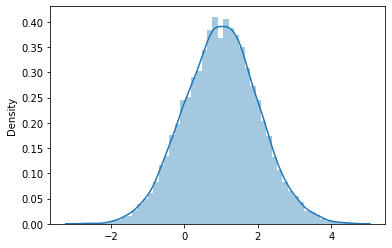

In [ ]:
sns.distplot(premios1);

In [ ]:
N = 10000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

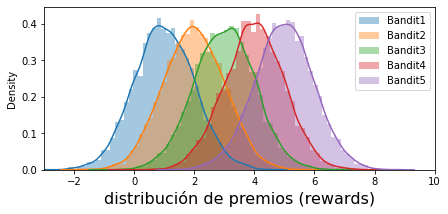

In [ ]:
bandit1 = Bandit(m1, std1)
bandit2 = Bandit(m2, std2)
bandit3 = Bandit(m3, std3)
bandit4 = Bandit(m4, std4)
bandit5 = Bandit(m5, std5)


premios1 = [bandit1.pull() for _ in range(N)]
premios2 = [bandit2.pull() for _ in range(N)]
premios3 = [bandit3.pull() for _ in range(N)]
premios4 = [bandit4.pull() for _ in range(N)]
premios5 = [bandit5.pull() for _ in range(N)]




plt.figure(figsize=(7,3))
sns.distplot(premios1, label='Bandit1')
sns.distplot(premios2, label='Bandit2')
sns.distplot(premios3, label='Bandit3')
sns.distplot(premios4, label='Bandit4')
sns.distplot(premios5, label='Bandit5')


plt.xlim(-3,10)
plt.xlabel('distribución de premios (rewards)', fontsize=16)
plt.legend();

In [ ]:
N = 100000

### Agente

In [ ]:
class estimacion_Bandit: # estimación del valor Q del Bandit
    def __init__(self):
        # se inicializan todas las estimaciones a 0
        self.suma_premios = 0
        self.N = 0
        self.mean = 0
        
    def update(self, x): # ahora obtengo premio x en la máquina
        self.suma_premios += x
        self.N += 1
        self.mean = self.suma_premios / self.N # estimación de Q

In [ ]:
estimacion = estimacion_Bandit()
estimacion

In [ ]:
estimacion.suma_premios, estimacion.N, estimacion.mean

(0, 0, 0)

In [ ]:
estimacion.update(10)
estimacion.suma_premios, estimacion.N, estimacion.mean

(10, 1, 10.0)

In [ ]:
estimacion.update(1)
estimacion.suma_premios, estimacion.N, estimacion.mean

(11, 2, 5.5)

In [ ]:
estimacion.update(0)
estimacion.suma_premios, estimacion.N, estimacion.mean

(11, 3, 3.6666666666666665)

In [ ]:
np.random.choice(3)

2

In [ ]:
np.argmax([10,-10,20,0,4])

2

In [ ]:
# Estrategia básica:
# - Primero se explora aleatoriamente
# - Cuando se ha explorado aleatoriamente, se procede a elegir siempre el bandit con mejor
#   estadística en la fase de exploración

def run_experiment_basic(bandits, N_total, N_explore, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    
    for i in range(N_total):
        if i < N_explore: # fase de exploración (elijo una máquina al azar)
            j = np.random.choice(len(bandits))
        else: # fase de explotación: elijo la máquina con mayor mean (Q estimada)
            j = np.argmax([y.mean for y in estimated_bandits])
        
        x = bandits[j].pull() # Echo moneda a máquina j y observo premio (reward) x
        estimated_bandits[j].update(x) # Actualizo estimación de máquina j
        # para dibujar luego:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, N*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, N*[bandits[3].mean], label='bandit 4 real mean')
        plt.plot(x, N*[bandits[4].mean], label='bandit 5 real mean')
        plt.plot(x, cumulative_average, label='average reward')
        plt.title('basic, N_explore={}'.format(N_explore), fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

In [ ]:
np.random.choice(10)

5

In [ ]:
100*(np.random.random(10000) < 0.2).mean()

19.99

In [ ]:
100*(np.random.random(10000) < 0.1).mean()

10.190000000000001

In [ ]:
np.random.random() < 0.1

False

In [ ]:
def run_experiment_egreedy(bandits, epsilon, N_total, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    
    for i in range(N_total):
        # epsilon greedy
        p = np.random.random()
        if p < epsilon: # explorar. Ocurre el 100*epsilon % de las veces
            j = np.random.choice(len(bandits))
        else: # explotar
            j = np.argmax([b.mean for b in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N_total) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N_total+1))
        plt.plot(x, N_total*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N_total*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N_total*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, N_total*[bandits[3].mean], label='bandit 4 real mean')
        plt.plot(x, N_total*[bandits[4].mean], label='bandit 5 real mean')
        plt.plot(x, cumulative_average, label='average reward')
        plt.title('$\epsilon$-greedy, $\epsilon$={}'.format(epsilon), fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

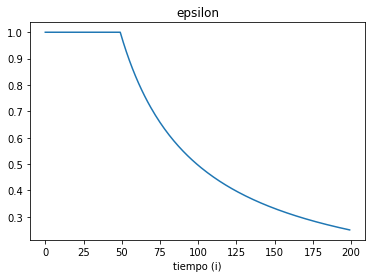

In [ ]:
k = 50
N_total = 200
epsilons = np.zeros(N_total)
for i in range(N_total): # i = tiempo (paso)
    epsilons[i] = min(1, k/(i+1))

plt.plot(epsilons)
plt.title("epsilon")
plt.xlabel("tiempo (i)");

In [ ]:
def run_experiment_egreedy_edecay(bandits, k, N_total, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    #epsilon = 1.
    epsilons = []
    for i in range(N_total):
        epsilon = min(1, k/(i+1)) # k=100 -> epsilon=1 hasta i==99, a partir de ahí <1
        epsilons.append(epsilon)
        # epsilon greedy
        p = np.random.random()
        if p < epsilon: # explorar
            j = np.random.choice(len(bandits))
        else: # explotar
            j = np.argmax([b.mean for b in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N_total+1))
        plt.plot(x, N_total*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N_total*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N_total*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, N_total*[bandits[3].mean], label='bandit 4 real mean')
        plt.plot(x, N_total*[bandits[4].mean], label='bandit 5 real mean')


        plt.plot(x, cumulative_average, label='average reward')
        plt.title('$\epsilon$-greedy $\epsilon$-decay', fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N_total+1))
        plt.plot(x, epsilons, label='epsilon')
        plt.legend(loc=4)
        plt.xscale('log')
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

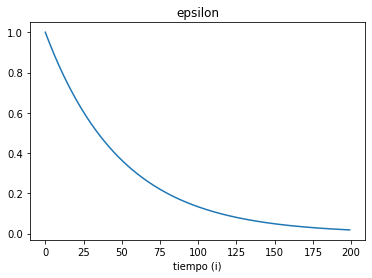

In [ ]:
N_total = 200
decay = 0.98
epsilons = np.zeros(N_total)
epsilon = 1
epsilons[0] = epsilon
for i in range(1, N_total): # i = tiempo (paso)
    epsilons[i] = decay * epsilons[i-1]

plt.plot(epsilons)
plt.title("epsilon")
plt.xlabel("tiempo (i)");

In [ ]:
def run_experiment_egreedy_edecay2(bandits, decay, N_total, vis=True):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    # decay: (0,1)
    rewards = np.empty(N_total)
    epsilon = 1.
    epsilons = []
    for i in range(N_total):
        epsilons.append(epsilon)
        # epsilon greedy
        p = np.random.random()
        if p < epsilon: # explorar
            j = np.random.choice(len(bandits))
        else: # explotar
            j = np.argmax([b.mean for b in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar:
        rewards[i] = x
        epsilon = epsilon*decay
        
    cumulative_reward  = np.cumsum(rewards)
    cumulative_average = cumulative_reward / (np.arange(N) + 1)

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N_total+1))

        '''
        plt.plot(x, N_total*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N_total*[bandits[1].mean], label='bandit 2 real mean')
        plt.plot(x, N_total*[bandits[2].mean], label='bandit 3 real mean')
        plt.plot(x, N_total*[bandits[3].mean], label='bandit 4 real mean')
        plt.plot(x, N_total*[bandits[4].mean], label='bandit 5 real mean')
        '''
        '''
        for i in range(len(bandits)):
          plt.plot(x, N_total*[bandits[0].mean], label='bandit {} 1 real mean'.format(i+1))

        '''

        for i, bandits in enumerate(bandits):
          plt.plot(x, N_total*[bandits.mean], label='bandit {} real mean'.format(i+1))


        plt.plot(x, cumulative_average, label='average reward')
        plt.title('$\epsilon$-greedy, $\epsilon$-decay2', fontsize=16)
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N_total+1))
        plt.plot(x, epsilons, label='epsilon')
        plt.legend(loc=4)
        #plt.xscale('log')
        plt.show()

    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

**Experimento básico**

In [ ]:
m1, std1, m2, std2, m3, std3, m4, std4, m5, std5

(1.0, 1, 2, 1, 3.0, 1, 4, 1, 5.0, 1)

In [ ]:
N

10000

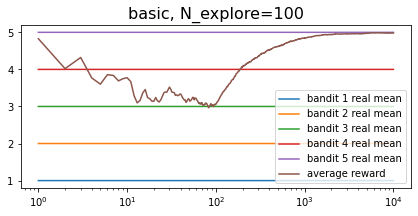

media estimada del bandit 1: 0.861
media estimada del bandit 2: 1.504
media estimada del bandit 3: 3.147
media estimada del bandit 4: 3.843
media estimada del bandit 5: 5.002


In [ ]:
bandit1 = Bandit(m1, std1, addseed=10)
bandit2 = Bandit(m2, std2, addseed=10)
bandit3 = Bandit(m3, std3, addseed=10)
bandit4 = Bandit(m4, std4, addseed=10)
bandit5 = Bandit(m5, std5, addseed=10)

#N_explore_basic = 5
N_explore_basic = 100
total_reward_basic, average_reward_basic  = run_experiment_basic([bandit1, bandit2, bandit3, bandit4, bandit5],
                                                                 N_total=N, N_explore=N_explore_basic)

In [ ]:
N

10000

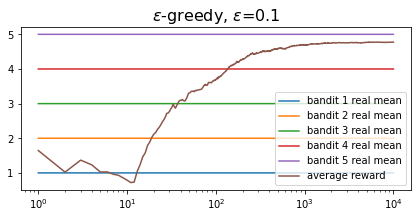

media estimada del bandit 1: 1.085
media estimada del bandit 2: 1.867
media estimada del bandit 3: 3.006
media estimada del bandit 4: 4.054
media estimada del bandit 5: 4.994






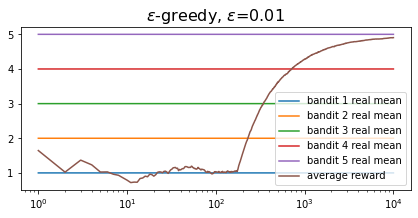

media estimada del bandit 1: 1.064
media estimada del bandit 2: 1.438
media estimada del bandit 3: 2.976
media estimada del bandit 4: 4.141
media estimada del bandit 5: 4.992






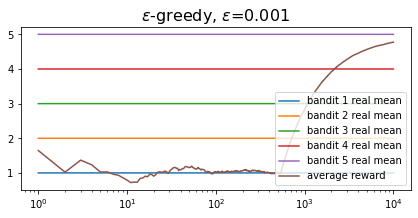

media estimada del bandit 1: 0.983
media estimada del bandit 2: 0.498
media estimada del bandit 3: 0
media estimada del bandit 4: 4.247
media estimada del bandit 5: 4.989






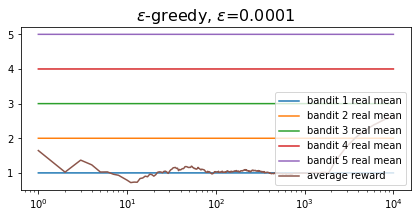

media estimada del bandit 1: 0.992
media estimada del bandit 2: 0
media estimada del bandit 3: 3.012
media estimada del bandit 4: 0
media estimada del bandit 5: 0






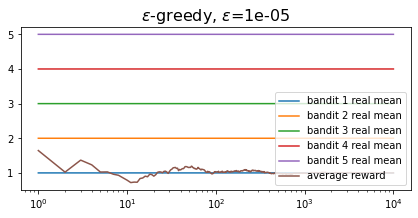

media estimada del bandit 1: 1.001
media estimada del bandit 2: 0
media estimada del bandit 3: 0
media estimada del bandit 4: 0
media estimada del bandit 5: 0






In [ ]:
epsilons = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

total_rewards = []
average_rewards = []
for e in epsilons:
    bandit1 = Bandit(m1, std1)
    bandit2 = Bandit(m2, std2)
    bandit3 = Bandit(m3, std3)
    bandit4 = Bandit(m4, std4)
    bandit5 = Bandit(m5, std5)


    total_reward, average_reward  = run_experiment_egreedy([bandit1, bandit2, bandit3, bandit4, bandit5],
                                                           epsilon=e, N_total=N)
    total_rewards.append(total_reward)
    average_rewards.append(average_reward)
    print("\n\n\n")

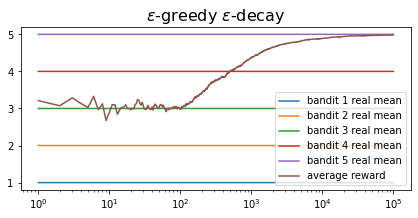

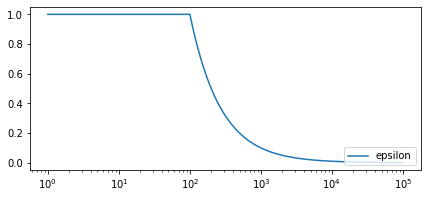

media estimada del bandit 1: 0.853
media estimada del bandit 2: 1.992
media estimada del bandit 3: 2.898
media estimada del bandit 4: 4.171
media estimada del bandit 5: 4.999


In [ ]:
bandit1 = Bandit(m1, std1, addseed=10)
bandit2 = Bandit(m2, std2, addseed=10)
bandit3 = Bandit(m3, std3, addseed=10)
bandit4 = Bandit(m4, std4, addseed=10)
bandit5 = Bandit(m5, std5, addseed=10)

bandits = [bandit1, bandit2, bandit3, bandit4, bandit5]

N = 100000
k = 100
total_reward_basic, average_reward_basic = run_experiment_egreedy_edecay(bandits, k, N)

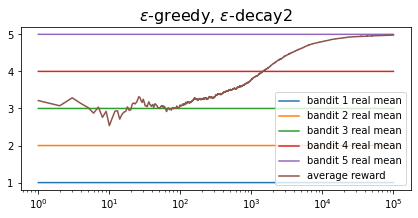

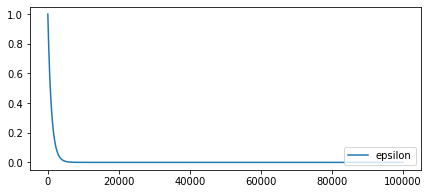

media estimada del bandit 1: 0.876
media estimada del bandit 2: 2.038
media estimada del bandit 3: 2.959
media estimada del bandit 4: 4.103
media estimada del bandit 5: 4.999


In [ ]:
bandit1 = Bandit(m1, std1, addseed=10)
bandit2 = Bandit(m2, std2, addseed=10)
bandit3 = Bandit(m3, std3, addseed=10)
bandit4 = Bandit(m4, std4, addseed=10)
bandit5 = Bandit(m5, std5, addseed=10)

bandits = [bandit1, bandit2, bandit3, bandit4, bandit5]

N = 100000
decay = 0.999 # epsilon = epsilon_ini*exp(-k*t)
total_reward_basic, average_reward_basic = run_experiment_egreedy_edecay2(bandits, decay, N)

ValueError: ignored

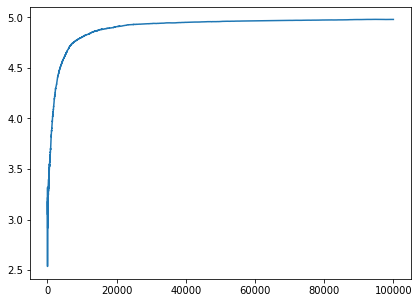

In [ ]:
plt.figure(figsize=(15,5))

# linear plot
plt.subplot(1,2,1)
x = np.array(range(1,N+1))
plt.plot(x, average_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for average_reward, e in zip(average_rewards, epsilons):
    plt.plot(x, average_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=4)
plt.xlabel('iteracion', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16)

# log scale plot
plt.subplot(1,2,2)
plt.plot(x, average_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for average_reward, e in zip(average_rewards, epsilons):
    plt.plot(x, average_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=4)
plt.xscale('log')
plt.xlabel('iteracion (log)', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16);

**Coste de oportunidad: para calcularlo hay que calcular el premio que consigo si desde el inicio apuesto "con trampa" al mejor bandit**

ValueError: ignored

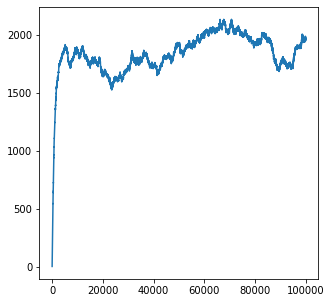

In [ ]:
plt.figure(figsize=(5,5))
max_m = max([m1,m2,m3, m4, m5])
optimal_bandit = Bandit(max_m)
optimal_gains = [optimal_bandit.pull() for _ in range(N)]

plt.plot(x, np.cumsum(optimal_gains) - total_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for total_reward, e in zip(total_rewards, epsilons):
    plt.plot(x, np.cumsum(optimal_gains) - total_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=0)
plt.xlabel('iteracion (log)', fontsize=16)
plt.title('total coste oportunidad ("regret")', fontsize=16);

**Ahora hago un promedio de diferentes repeticiones**

In [ ]:
Nreps = 50
N = 10000
total_reward_matrix = np.empty((4,Nreps,N))
average_reward_matrix = np.empty((4,Nreps,N))
for i,e in enumerate([-1]+epsilons):
    for rep in range(Nreps):
        if e == -1:
            print("\rbasic, N_explore={}, repetición {}/{}".format(N_explore_basic, rep+1, Nreps),end="")
            bandits = [Bandit(m1, std1, addseed=rep),
                       Bandit(m2, std2, addseed=rep),
                       Bandit(m3, std3, addseed=rep)]
            total_reward, average_reward  = run_experiment_basic(bandits, N_total=N,
                                                                 N_explore=N_explore_basic,
                                                                 vis=False)
        else:
            print("\repsilon={}, repetición {}/{}".format(e, rep+1, Nreps),end="")
            bandits = [Bandit(m1, std1, addseed=rep),
                       Bandit(m2, std2, addseed=rep),
                       Bandit(m3, std3, addseed=rep)]
            total_reward, average_reward  = run_experiment_egreedy(bandits, epsilon=e,
                                                                   N_total=N, vis=False)
        
        total_reward_matrix[i][rep] = total_reward
        average_reward_matrix[i][rep] = average_reward
    print()

basic, N_explore=5, repetición 50/50
epsilon=0.1, repetición 50/50
epsilon=0.01, repetición 50/50
epsilon=0.001, repetición 50/50


In [ ]:
Nreps, N

(50, 10000)

In [ ]:
total_reward_edecay = np.empty((Nreps,N))
average_reward_edecay = np.empty((Nreps,N))

for rep in range(Nreps):
    bandits = [Bandit(m1, std1, addseed=rep),
               Bandit(m2, std2, addseed=rep),
               Bandit(m3, std3, addseed=rep)]
    total_reward, average_reward = run_experiment_egreedy_edecay(bandits, k=100, N_total=N, vis=False)
    
    total_reward_edecay[rep] = total_reward
    average_reward_edecay[rep] = average_reward

In [ ]:
total_reward_edecay.shape, average_reward_edecay.shape

((50, 10000), (50, 10000))

In [ ]:
total_reward_edecay2 = np.empty((Nreps,N))
average_reward_edecay2 = np.empty((Nreps,N))

for rep in range(Nreps):
    bandits = [Bandit(m1, std1, addseed=rep),
               Bandit(m2, std2, addseed=rep),
               Bandit(m3, std3, addseed=rep)]
    total_reward, average_reward = run_experiment_egreedy_edecay2(bandits, N_total=N, decay = 0.99, vis=False)
    
    total_reward_edecay2[rep] = total_reward
    average_reward_edecay2[rep] = average_reward

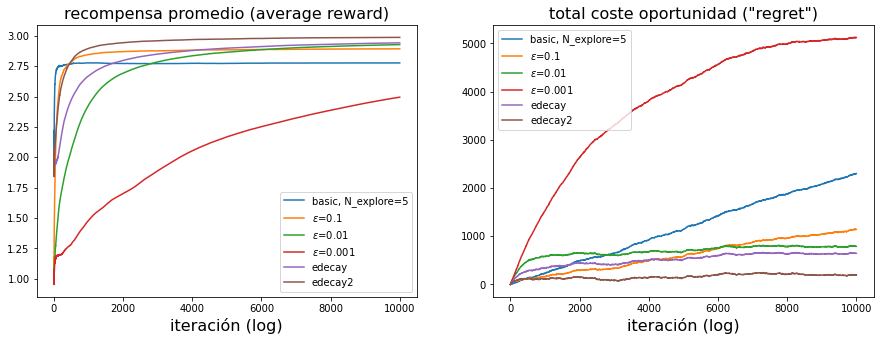

In [ ]:
plt.figure(figsize=(15,5))
x = np.array(range(1,N+1))
aux_a = average_reward_matrix.mean(axis=1)
aux_a_std = average_reward_matrix.std(axis=1)
# log scale plot
plt.subplot(1,2,1)
for i in range(4):
    if i == 0:
        plt.plot(x, aux_a[0], label='basic, N_explore={}'.format(N_explore_basic))
    else:
        plt.plot(x, aux_a[i], label='$\epsilon$={}'.format(epsilons[i-1]))
plt.plot(x, average_reward_edecay.mean(axis=0), label='edecay')
plt.plot(x, average_reward_edecay2.mean(axis=0), label='edecay2')

plt.legend(loc=4)
plt.xlabel('iteración (log)', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16)

aux_t = total_reward_matrix.mean(axis=1)
aux_t_std = total_reward_matrix.std(axis=1)
plt.subplot(1,2,2)
max_m = max([m1,m2,m3])
optimal_bandit = Bandit(mean=max_m)
optimal_gains = [optimal_bandit.pull() for _ in range(N)]

for i in range(4):
    if i==0:
        plt.plot(x, np.cumsum(optimal_gains) - aux_t[i], label='basic, N_explore={}'.format(N_explore_basic))
    else:
        plt.plot(x, np.cumsum(optimal_gains) - aux_t[i], label='$\epsilon$={}'.format(epsilons[i-1]))

plt.plot(x, np.cumsum(optimal_gains) - total_reward_edecay.mean(axis=0), label='edecay')
plt.plot(x, np.cumsum(optimal_gains) - total_reward_edecay2.mean(axis=0), label='edecay2')

plt.legend(loc=0)
plt.xlabel('iteración (log)', fontsize=16)
plt.title('total coste oportunidad ("regret")', fontsize=16);